(array([20277.46076389, 20277.46082176, 20277.46087963, 20277.4609375 ,
        20277.46099537]),
 [Text(20277.46076388889, 0, '11:03:30'),
  Text(20277.460821759258, 0, '11:03:35'),
  Text(20277.46087962963, 0, '11:03:40'),
  Text(20277.4609375, 0, '11:03:45'),
  Text(20277.46099537037, 0, '11:03:50')])

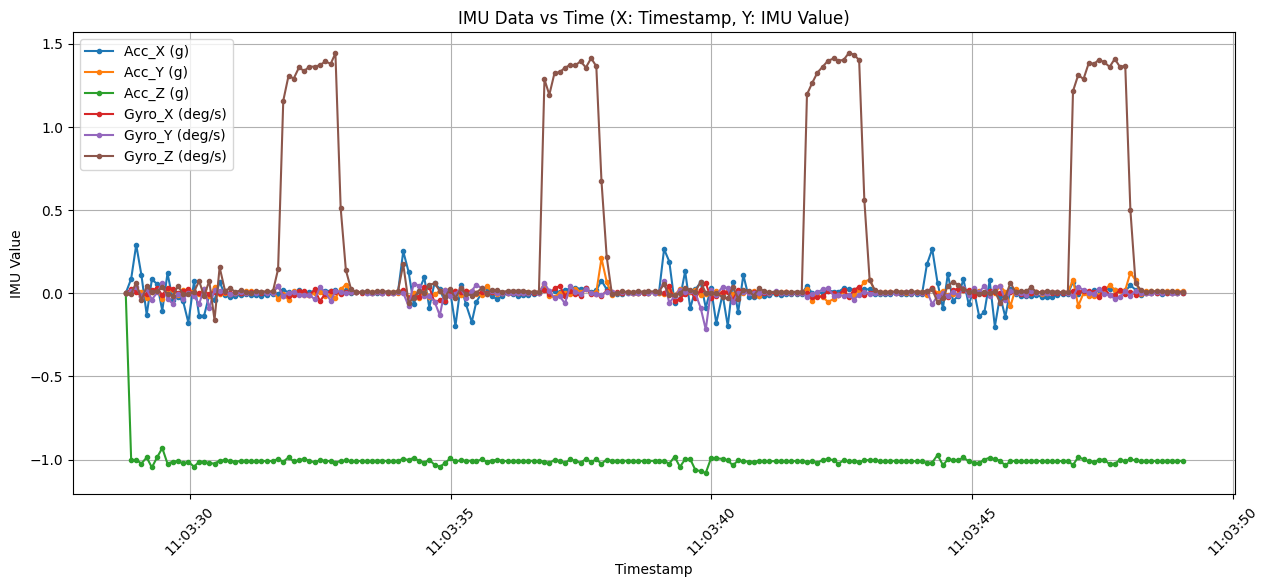

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_4_imu.csv")

# แปลงคอลัมน์เวลาเป็น datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# เตรียมชื่อคอลัมน์ที่ต้องการพล็อต
imu_cols = [
    'Acc_X (g)', 'Acc_Y (g)', 'Acc_Z (g)',
    'Gyro_X (deg/s)', 'Gyro_Y (deg/s)', 'Gyro_Z (deg/s)'
]

# Plot ข้อมูล IMU ทุกคอลัมน์ในกราฟเดียวกัน
plt.figure(figsize=(15, 6))
for col in imu_cols:
    plt.plot(df['Timestamp'], df[col], marker='.', linestyle='-', label=col)

plt.xlabel('Timestamp')
plt.ylabel('IMU Value')
plt.title('IMU Data vs Time (X: Timestamp, Y: IMU Value)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

(array([20277.46076389, 20277.46082176, 20277.46087963, 20277.4609375 ,
        20277.46099537]),
 [Text(20277.46076388889, 0, '11:03:30'),
  Text(20277.460821759258, 0, '11:03:35'),
  Text(20277.46087962963, 0, '11:03:40'),
  Text(20277.4609375, 0, '11:03:45'),
  Text(20277.46099537037, 0, '11:03:50')])

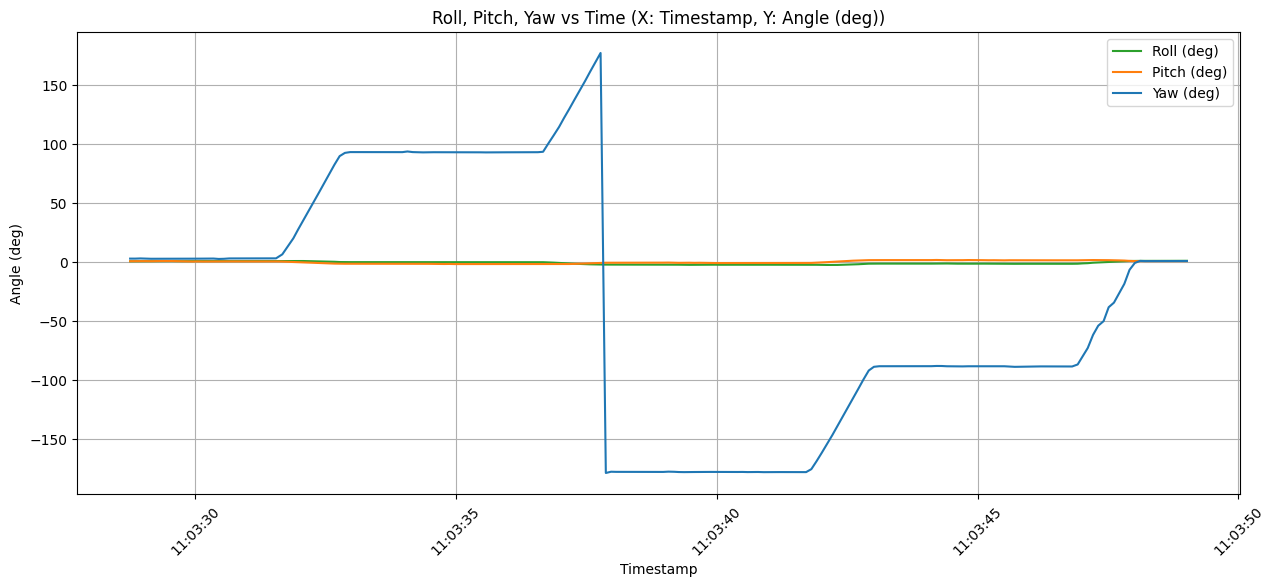

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_4_attitude.csv")

# แปลงคอลัมน์เวลาเป็น datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot Roll, Pitch, Yaw ในกราฟเดียวกัน

# รบกวนอ่านหน่อยครับ555555 ขอบคุณครับ
# ในไฟล์.csvเรียงcolumnผิดอยู่เลยสลับข้อมูลที่plotออกมานิดหน่อยครับ


plt.figure(figsize=(15, 6))
plt.plot(df['Timestamp'], df['Yaw (deg)'], label='Roll (deg)', color='tab:green')
plt.plot(df['Timestamp'], df['Pitch (deg)'], label='Pitch (deg)', color='tab:orange')
plt.plot(df['Timestamp'], df['Roll (deg)'], label='Yaw (deg)', color='tab:blue')

plt.xlabel('Timestamp')
plt.ylabel('Angle (deg)')
plt.title('Roll, Pitch, Yaw vs Time (X: Timestamp, Y: Angle (deg))')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

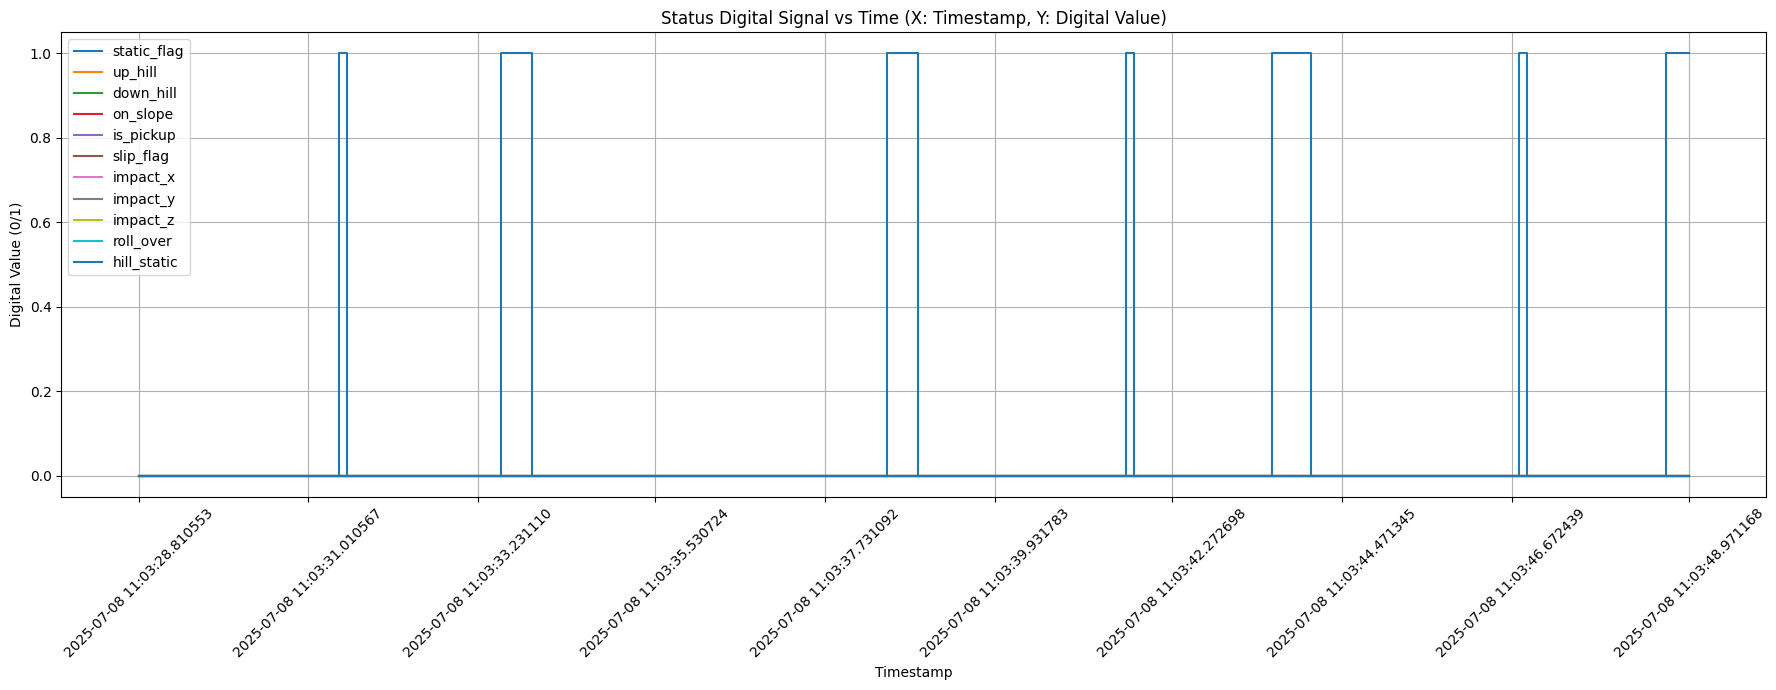

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_4_status.csv")

# แปลงคอลัมน์ data จาก string เป็น list
df['data'] = df['data'].apply(ast.literal_eval)

# กำหนด label ตามลำดับข้อมูลจาก sub_status
status_labels = [
    "static_flag", "up_hill", "down_hill", "on_slope", "is_pickup",
    "slip_flag", "impact_x", "impact_y", "impact_z", "roll_over", "hill_static"
]

# ถ้าข้อมูลมี 12 ค่า ให้เพิ่ม label ให้ครบ
if len(df['data'][0]) == 12:
    status_labels = [
        "static_flag", "up_hill", "down_hill", "on_slope", "is_pickup",
        "slip_flag", "impact_x", "impact_y", "impact_z", "roll_over", "hill_static"
    ]
elif len(df['data'][0]) == 11:
    # กรณีข้อมูลมี 11 ค่า (ตามรูป)
    status_labels = [
        "static_flag", "up_hill", "down_hill", "on_slope", "is_pickup",
        "slip_flag", "impact_x", "impact_y", "impact_z", "roll_over", "hill_static"
    ]
else:
    # fallback: val_1, val_2, ...
    status_labels = [f'val_{i+1}' for i in range(len(df['data'][0]))]

# แยกข้อมูลแต่ละค่าใน data ออกมาเป็นคอลัมน์ใหม่
data_expanded = pd.DataFrame(df['data'].tolist(), columns=status_labels)

# รวมกับ Timestamp
df_plot = pd.concat([df['Timestamp'], data_expanded], axis=1)

plt.figure(figsize=(18, 7))
for col in status_labels:
    plt.step(df_plot['Timestamp'], df_plot[col], where='post', label=col)

plt.xlabel('Timestamp')
plt.ylabel('Digital Value (0/1)')
plt.title('Status Digital Signal vs Time (X: Timestamp, Y: Digital Value)')
plt.legend()
plt.grid(True)

# โชว์ label timestamp แค่ 10 อัน (กระจายเท่าๆ กัน)
num_ticks = 10
tick_indices = np.linspace(0, len(df_plot['Timestamp']) - 1, num_ticks, dtype=int)
plt.xticks(df_plot['Timestamp'].iloc[tick_indices], rotation=45)

plt.tight_layout()
plt.show()

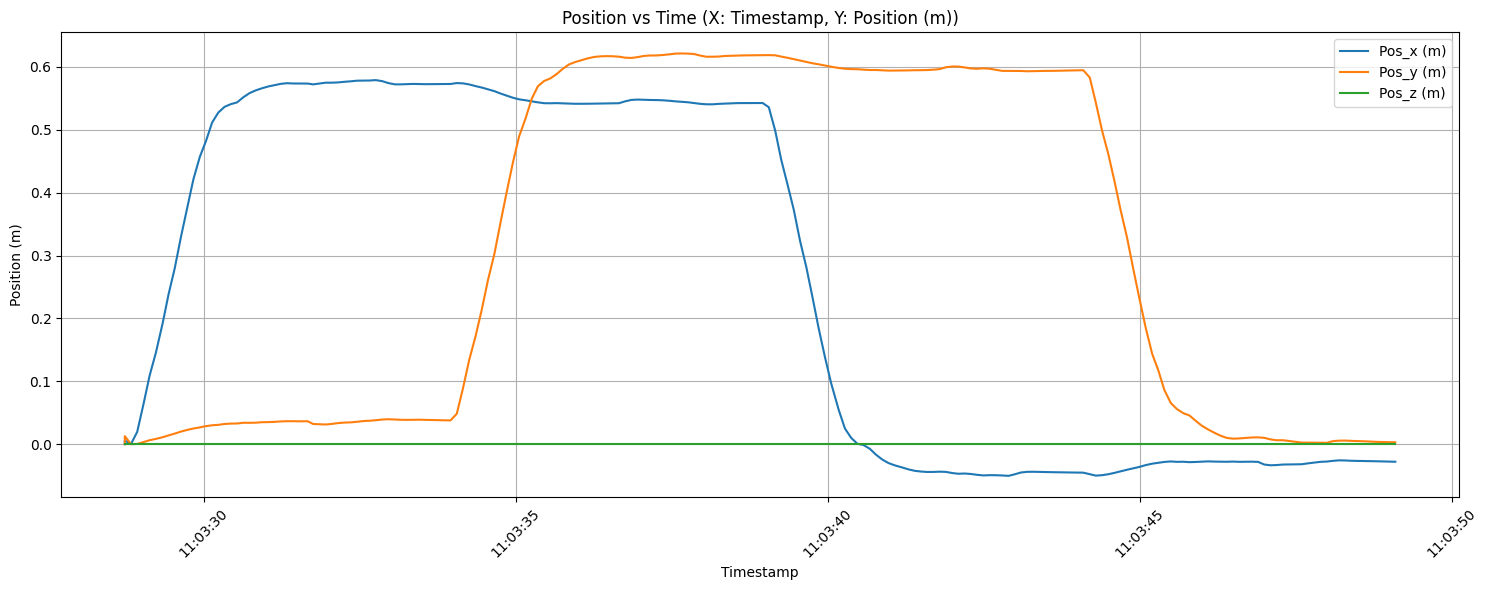

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_4_position.csv")

# แปลงคอลัมน์เวลาเป็น datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot Pos_x, Pos_y, Pos_z ในกราฟเดียวกัน
plt.figure(figsize=(15, 6))
plt.plot(df['Timestamp'], df['Pos_x (m)'], label='Pos_x (m)', color='tab:blue')
plt.plot(df['Timestamp'], df['Pos_y (m)'], label='Pos_y (m)', color='tab:orange')
plt.plot(df['Timestamp'], df['Pos_z (m)'], label='Pos_z (m)', color='tab:green')

plt.xlabel('Timestamp')
plt.ylabel('Position (m)')
plt.title('Position vs Time (X: Timestamp, Y: Position (m))')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

([<matplotlib.axis.XTick at 0x2b9c6821fa0>,
 [Text(0.0, 0, '2025-07-08 11:03:28.792033'),
  Text(22.0, 0, '2025-07-08 11:03:30.991239'),
  Text(44.0, 0, '2025-07-08 11:03:33.211060'),
  Text(67.0, 0, '2025-07-08 11:03:35.510797'),
  Text(89.0, 0, '2025-07-08 11:03:37.712094'),
  Text(112.0, 0, '2025-07-08 11:03:40.018930'),
  Text(134.0, 0, '2025-07-08 11:03:42.252277'),
  Text(157.0, 0, '2025-07-08 11:03:44.558053'),
  Text(179.0, 0, '2025-07-08 11:03:46.752125'),
  Text(202.0, 0, '2025-07-08 11:03:49.051545')])

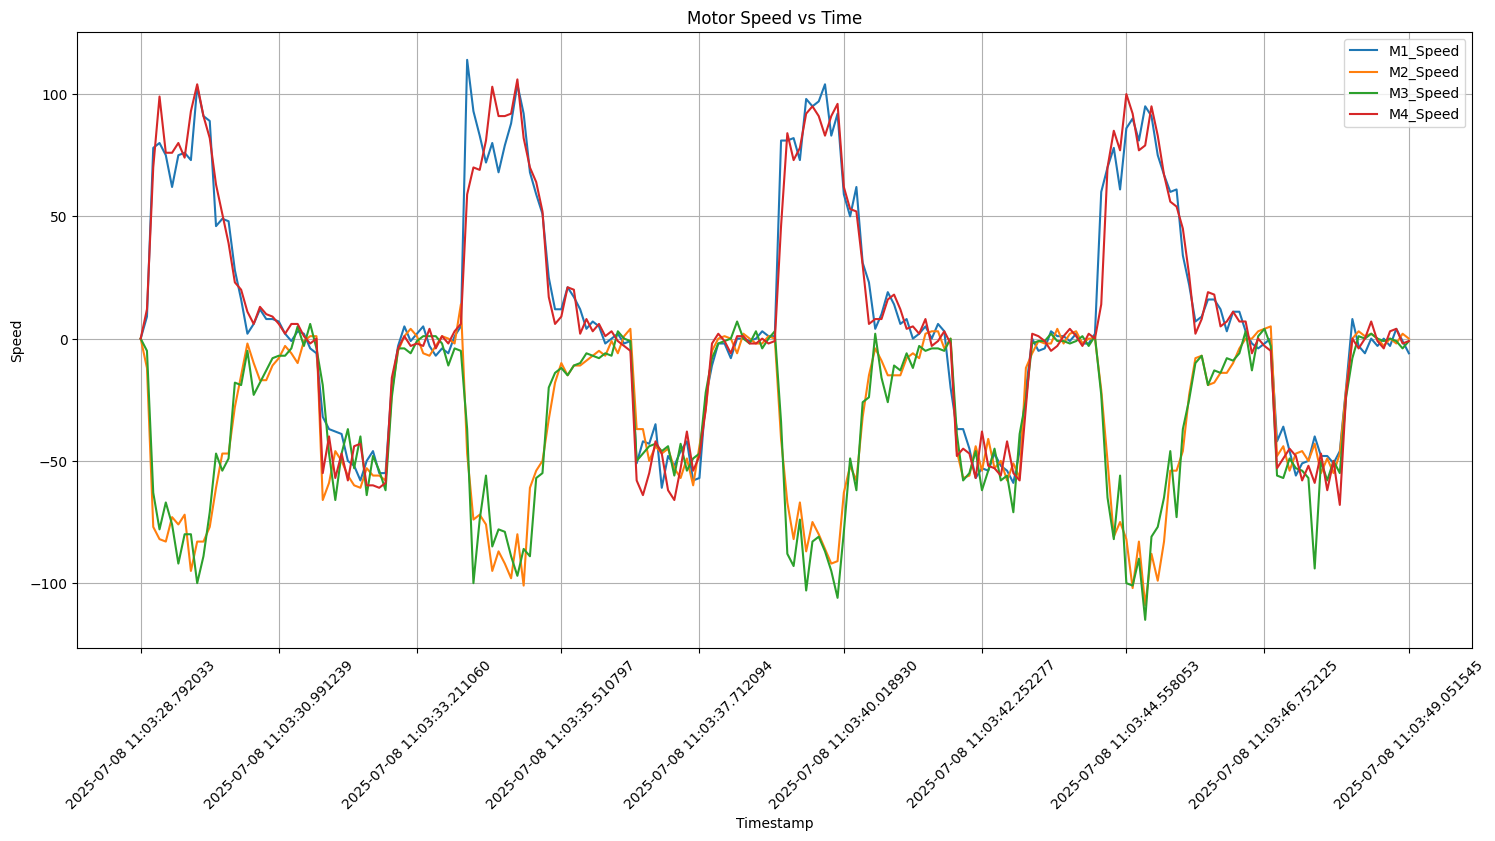

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_4_esc.csv")

# แปลงคอลัมน์ที่เป็น string list ให้เป็น list จริง
df['Speed'] = df['Speed'].apply(ast.literal_eval)
df['Angle'] = df['Angle'].apply(ast.literal_eval)
df['Timestamp_internal'] = df['Timestamp_internal'].apply(ast.literal_eval)
df['State'] = df['State'].apply(ast.literal_eval)

# สร้าง DataFrame สำหรับแต่ละกลุ่มข้อมูล
speed_df = pd.DataFrame(df['Speed'].tolist(), columns=['M1_Speed', 'M2_Speed', 'M3_Speed', 'M4_Speed'])
angle_df = pd.DataFrame(df['Angle'].tolist(), columns=['M1_Angle', 'M2_Angle', 'M3_Angle', 'M4_Angle'])
timestamp_df = pd.DataFrame(df['Timestamp_internal'].tolist(), columns=['M1_Timestamp', 'M2_Timestamp', 'M3_Timestamp', 'M4_Timestamp'])
state_df = pd.DataFrame(df['State'].tolist(), columns=['M1_State', 'M2_State', 'M3_State', 'M4_State'])

# รวม Timestamp หลัก
speed_df['Timestamp'] = df['Timestamp_capture']

# Plot กราฟ Speed ของมอเตอร์แต่ละตัว
plt.figure(figsize=(18, 8))
for m in ['M1_Speed', 'M2_Speed', 'M3_Speed', 'M4_Speed']:
    plt.plot(speed_df['Timestamp'], speed_df[m], label=m)
plt.xlabel('Timestamp')
plt.ylabel('Speed')
plt.title('Motor Speed vs Time')
plt.legend()
plt.grid(True)

# โชว์ label timestamp แค่ 10 อัน (กระจายเท่าๆ กัน)
num_ticks = 10
tick_indices = np.linspace(0, len(speed_df['Timestamp']) - 1, num_ticks, dtype=int)
plt.xticks(speed_df['Timestamp'].iloc[tick_indices], rotation=45)

In [4]:
import pandas as pd

# อ่านไฟล์ CSV ต้นฉบับ
df = pd.read_csv("data\move_square_robot_log_4_imu.csv")

# สร้างไฟล์สำหรับค่า Acc
acc_df = df[['Timestamp', 'Acc_X (g)', 'Acc_Y (g)', 'Acc_Z (g)']]
acc_df.to_csv("move_square_robot_log_4_imu_acc.csv", index=False)

# สร้างไฟล์สำหรับค่า Gyro
gyro_df = df[['Timestamp', 'Gyro_X (deg/s)', 'Gyro_Y (deg/s)', 'Gyro_Z (deg/s)']]

In [5]:
import pandas as pd

# อ่านไฟล์ CSV ต้นฉบับ
df = pd.read_csv("data\move_square_robot_log_4_imu.csv")

# สร้างไฟล์สำหรับค่า Acc
acc_df = df[['Timestamp', 'Gyro_X (deg/s)','Gyro_Y (deg/s)','Gyro_Z (deg/s)']]
acc_df.to_csv("move_square_robot_log_4_imu_Gyro.csv", index=False)


In [9]:

import pandas as pd

# อ่านไฟล์ CSV ต้นฉบับ
df = pd.read_csv("gimbal_tof_data.csv")

# สร้างไฟล์สำหรับค่า Acc
acc_df = df[['timestamp', 'tof1','tof2','tof3','tof4']]
acc_df.to_csv("distance.csv", index=False)

